# MCNP5 photon transport calculation based on the MCCM algorithm

- 输入脚本-mcnp

**F4 -记录光谱  ELC --将电子和正电子进行区分**

mcnp
The calculation in Titanium oxide                                               
1 1 -4.23 2 -1 4 -3 5 -6 fill=1 imp:p,e 1                                       
10 1 -4.23 2 -1 4 -3 5 -10 lat=1 u=1 imp:p,e 1                                  
100 2 -0.001293 (101 -102 -100)#1 imp:p,e 1                                     
999 0 -101:102:100  imp:p=0  imp:e=0                                            
                                                                                
1 px 0.5                                                                        
2 px -0.5                                                                       
3 py 0.5                                                                        
4 py -0.5                                                                       
5 pz 0.01                                                                        
6 pz 0.16 
7 px -0.49 
8 py -0.49                                                                    
10 pz 0.02                                                                     
100 cz 0.9                                                                      
101 pz -0.1                                                                     
102 pz 6.0                                                                      
                                                                                
mode p e                                                                        
m1 22000 1 8016 2                                                               
m2 7014  -0.755636 8016  -0.231475 18000  -0.012889 
sdef pos=0 0 0 axs=0 0 1  x=d1 y=d2 z=0  erg=10.0 par=2 vec=0 0 1 dir=1                                             
si1 -0.5 0.5                                                                    
sp1 0 1                                                                         
si2 -0.5 0.5
sp2 0 1  
e1 0 999i 10.0 
e4 0 999i 10.0                                                                                                     
F1:e 10                                                                                                                                         
c e6 0 61i 0.622                                                                 
F4:e 10 
FT4 ELC 3
c *FMESH4:e geom=xyz   origin=-0.5 -0.5 0.01
c          imesh=0.5   iints=10
c          jmesh=0.5   jints=10
c           kmesh=0.11  kints=1 
c          emesh=0.001 0.62   out=ij                                                                    
c *F4:e (10<10[-9:0 -9:0 0:0]) 
c F6:p 10 
c *F8:p 10                                                   
c F6:p 10 (10<10[0:0 0:0 -9:0])                                                                                                                
cut:e j 0.001                                                                   
cut:p j 0.001
PHYS:P 4j 1 
nps 20000000
print                                                                  
       

## 1. Extract the flux energy from the mcnp OUTPUT file

In [87]:
def extract_flux(filename):
    index=0
    list_energy=[]
    list_total=[]
    list_electron=[]
    list_positron=[]
    with open(filename,"r") as f:
        line=f.readline()
        while line:
            if line[:9]==' cell  10':
                f.readline()
                index=index+1
                for i in range(126):
                    energy,f4,error = f.readline().split()
                    list_energy.append(energy)
                    if(index==1):
                        list_positron.append(f4)
                    elif(index==2):
                        list_electron.append(f4)
                    else:
                        list_total.append(f4)
            line=f.readline()
        print(list_total)
    return list_energy,list_total,list_electron,list_positron
                            
              

[]


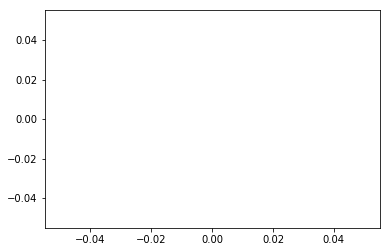

In [88]:
import matplotlib.pylab as plt
import numpy as np
filename = "outp"
energy,total,electron,positron=extract_flux(filename)
energy_x=energy[:301]
plt.plot(energy_x,total,'ro')
# plt.xlim((0.0,3.0))
# plt.ylim((0.0,0.000007))
# plt.plot(energy_x,electron,'go')
# plt.plot(energy_x,positron,'b-')
plt.show()


**下图显示了光子输运过程中电子、正电子和总的电子数的通量密度随能量的变化**

<img src="../figures/fig1.jpg"/>

<font color=red size="3"> 由于上述mcnp的特殊处理，上述图像位于x轴下方的实际在上方,如下图所示</font>

<img src="../figures/fig2.jpg">

<font size="4" color=red> 最后得到的总的电子数目的谱，与MCCM算法类似</font>

<img src="../figures/fig3.jpg">

# 2. 提取数据，能量范围（1.25-10MeV）

## 2.1在一个文件目录下批处理mcnp文件

In [16]:
%pycat files.py

import os
import numpy as np

def eachFile(filepath):
        j=0
        pathDir = os.listdir(filepath)   #获取当前路径下的文件名，返回list
        for s in pathDir:
                newDir=os.path.join(filepath,s)   #将文件名写入到当前文件路径后面
                if os.path.isfile(newDir): #如果是文件
                    if os.path.splitext(newDir)[1]==".txt":  #判断是否是txt
                        readFile(newDir)
                        j=j+1
                        print(j)
                        pass
                    else:
                        break
                        # eachFile(newDir)



def readFile(filepath):
        # f_energy = open("energy.txt","w")
        # i=0
        index=0                  #控制数据存入不同的list
        # list_total=[]
        # list_electron=[]
        # list_positron=[]
        with open(filepath,"r") as f:
                line=f.readline()
#               print(line)
                while line:
                        if line[:9]==' cell  10':     #根据关键词抽取数据
                       

<font size="5" color=blue>在jupyter lab下运行目录下的python文件(%run examples.py)</font>

In [31]:
%run files.py

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1890


## 2.2Python 从一个文件中提取相应的谱数据

In [45]:
def file_flux(filename,number):
    index=0
    list_total=[]
    list_electron=[]
    list_positron=[]
    with open(filename,"r") as f:
        line=f.readline()
        while line:
            if line[:9]==' cell (10':
                f.readline()
                index=index+1                                                                                                                    
                for i in range(number):
                    energy,f4,error=f.readline().split()
                    if((index%3)==1):
                        list_positron.append(f4)
                    elif((index%3)==2):
                        list_electron.append(f4)
                    else:
                        list_total.append(f4)
            line=f.readline()       
    return list_total,list_electron,list_positron

In [76]:
import numpy as np
output=open("electron.txt",'w')
filename="outy"
number = 1001
total,electron,positron=file_flux(filename,number)
listdata_total= np.reshape(total,(15,number)).T
listdata_electron=np.reshape(electron,(15,number)).T
listdata_positron=np.reshape(positron,(15,number)).T
for i in range(number):
    for j in range(15):
        output.write(listdata_electron[i][j]+' ')
        output.write('\t')
    output.write('\n')
output.close()
print(listdata_total)



[['0.00000E+00' '0.00000E+00' '0.00000E+00' ... '0.00000E+00'
  '0.00000E+00' '0.00000E+00']
 ['7.87389E-07' '8.76579E-07' '9.23749E-07' ... '8.69637E-07'
  '7.68935E-07' '5.47370E-07']
 ['1.55507E-06' '1.75322E-06' '1.85886E-06' ... '1.74720E-06'
  '1.54119E-06' '1.08396E-06']
 ...
 ['0.00000E+00' '0.00000E+00' '0.00000E+00' ... '0.00000E+00'
  '0.00000E+00' '0.00000E+00']
 ['0.00000E+00' '0.00000E+00' '0.00000E+00' ... '0.00000E+00'
  '0.00000E+00' '0.00000E+00']
 ['4.43665E-07' '9.81851E-07' '7.67542E-07' ... '3.27221E-07'
  '1.97381E-06' '5.94740E-06']]


In [24]:
import numpy as np
list1=[]

def f(n):
    global list1
    for i in range(n):
        list1.append(i)
        
f(2)
f(4)
list2=np.reshape(list1,(2,3))
np.savetxt("test.txt",list2)

In [34]:
4%3

1

# 3.MCCM算法的Fortran程序部分

### 计算光子--->电子---->PKA的能量转换关系

* <font size=4 color=blue>康普顿效应</font>

In [4]:
## Compton scatter condition
import numpy as np
import matplotlib.pylab as plt
gamma_energy = input("Please input the gamma energy:")
gamma_energy = float(gamma_energy)
# Ee0 = 0.511  #electron mass energy: 0.511MeV
theta = np.linspace(0,np.pi,100)
cos_theta = np.cos(theta)

E_electron = gamma_energy*gamma_energy*(1-cos_theta)/(Ee0+gamma_energy*(1-cos_theta))

E_electron_max = gamma_energy/(1+Ee0/(2*gamma_energy))

plt.plot(theta,E_electron,color='red',linewidth=2,linestyle='--')
plt.grid()
plt.show()




Please input the gamma energy: 1.25


<Figure size 640x480 with 1 Axes>

* <font size=4 color=blue>电子辐照损伤中的能量传递</font>

formula 1: $E^2 = (pc)^2+(m_0c^2)^2$

formula 2: $E_k = mc^2-m_0c^2$

formula 4: $E = mc^2$

formula 5: $m = \frac{m_0}{\sqrt(1-(\frac{v}{c})^2)} $

In [8]:
# relativic electron velocity value
def vector(Ee0,E_electron):
    c = 3*10**8
    kactor = ((E_kelectron+Ee0)**2-(Ee0)**2)/(Ee0**2)
    vec = np.sqrt(kactor/(1+kactor))*c
    return vec

# E_kelectron = E_electron_max
# vec1 = vector(Ee0,E_kelectron)
# print(vec1)
    

283202687.3538823


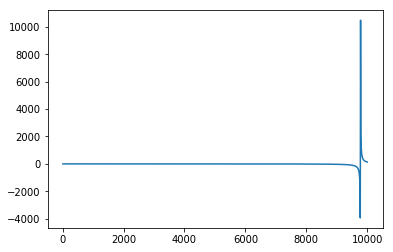

44698612.49999999
[-1853.84143935537, 831.841439355369]
831.8414393553692


In [17]:
# Basic parameters
from sympy import *
# Em = symbols('Em')
def Eaverage(Ed,alpha,beta,Em):
    E_ave = Em*(np.log(Em/Ed)-beta*beta*(1-Ed/Em)+np.pi*alpha*beta*(2*(1-np.sqrt(Ed/Em)-(1-Ed/Em))))/(Ed/Em-1-beta*beta*np.log(Em/Ed)+np.pi*alpha*beta*(2*(np.sqrt(Em/Ed)-1)-np.log(Em/Ed)))
    return E_ave

Z = 22
M = 47.87
Ed = 0.069
alpha = Z/137
C = 3*10**8
mc = 1.66*10**(-27)
q = 1.6*10**(-16)
Ee0 = 511
EM0 = M*mc*C*C/q
E_energy,E_pkaenergy = [],[]
for i in range(1000):
    E_electron = 10*(i+1)
    vec0 = vector(Ee0,E_electron)
    beta = vec0/C
    Em = 2*E_electron*(E_electron+2*511)/EM0
    E_ave = Eaverage(Ed,alpha,beta,Em)
    E_energy.append(E_electron)
    E_pkaenergy.append(E_ave)
    
plt.plot(E_energy,E_pkaenergy)
plt.show()

    
# solution = Em*(np.log(Em/Ed)-beta*beta*(1-Ed/Em)+np.pi*alpha*beta*(2*(1-np.sqrt(Ed/Em)-(1-Ed/Em))))/(Ed/Em-1-beta)

# E_kelectron = E_electron_max
# vec0 = vector(Ee0,E_kelectron)
# beta = vec0/C
# Em = 19*np.exp(2-alpha*np.pi)*10**(-3)
print(EM0)
print(solve(2*Ee_energy*Ee_energy+4*511*Ee_energy-Ed*EM0,Ee_energy))
Ecut = np.sqrt(511*511+EM0*Ed/2)-511


print(Ecut)


<font size="5" color=blue>Fortran程序和Python程序交互，利用f2py工具</font>

<font size="4.5" color=green>计算由电子传递给初级离位原子(PKA)造成的缺陷数目</font>

In [59]:
%pycat pka_number.f90

subroutine pka_number(Z,M,number)
        implicit none
        real,parameter ::me=9.11d-31,q=1.6d-16,&
                         mc=1.99d-26,r0=2.8d-15,Ed=0.073,T1=0.5
        real :: Z,M
        real :: number
        !f2py intent(in) Z,M
        !f2py intent(out) number
        
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!Calculation the PKA numbers of defects
!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    if(T1<=Ed)then
        number=0
    else if(T1>Ed.and.T1<=2*Ed/0.8)then
        number=1
    else
        number=0.8*T1/(2*Ed)
    end if
end subroutine


<font size="5" color=red> Fortran 和 Python文件实现的二种方式</font>

- 利用f2py + Visual Studio 2017(Intel Fortran)实现(mccm_pka.bat文件）

- 利用numpy.distutils包进行，命令：!python setup_example.py build_ext --inplace

In [60]:
!mccm_pka.bat


F:\MCwork\MCCM\scripts\filesworks>set "ifor1=C:\Program Files (x86)\IntelSWTools\compilers_and_libraries_2018.5.274" 

F:\MCwork\MCCM\scripts\filesworks>set "ifor2=C:\Program Files (x86)\IntelSWTools\compilers_and_libraries_2018.3.210" 

F:\MCwork\MCCM\scripts\filesworks>if exist "C:\Program Files (x86)\IntelSWTools\compilers_and_libraries_2018.5.274" (set "ifor=C:\Program Files (x86)\IntelSWTools\compilers_and_libraries_2018.5.274" ) 

F:\MCwork\MCCM\scripts\filesworks>if exist "C:\Program Files (x86)\IntelSWTools\compilers_and_libraries_2018.3.210" (set "ifor=C:\Program Files (x86)\IntelSWTools\compilers_and_libraries_2018.3.210" ) 

F:\MCwork\MCCM\scripts\filesworks>set "PATH=C:\Program Files (x86)\IntelSWTools\compilers_and_libraries_2018.5.274\windows\bin;C:\Program Files (x86)\IntelSWTools\compilers_and_libraries_2018.5.274\windows\mpi\intel64\bin;C:\Program Files (x86)\Common Files\Intel\Shared Libraries\redist\intel64_win\mpirt;C:\Program Files (x86)\Common Files\Intel\Shared 

In [62]:
!python setup_example.py build_ext --inplace

running build_ext
running build_src
build_src
building extension "pka_number" sources
f2py options: []
f2py:> build\src.win-amd64-3.7\pka_numbermodule.c
creating build
creating build\src.win-amd64-3.7
Reading fortran codes...
	Reading file 'pka_number.f90' (format:free)
Post-processing...
	Block: pka_number
			Block: pka_number
In: :pka_number:pka_number.f90:pka_number
get_parameters: got "invalid syntax (<string>, line 1)" on '9.11d-31'
In: :pka_number:pka_number.f90:pka_number
get_parameters: got "invalid syntax (<string>, line 1)" on '1.6d-16'
In: :pka_number:pka_number.f90:pka_number
get_parameters: got "invalid syntax (<string>, line 1)" on '1.99d-26'
In: :pka_number:pka_number.f90:pka_number
get_parameters: got "invalid syntax (<string>, line 1)" on '2.8d-15'
Post-processing (stage 2)...
Building modules...
	Building module "pka_number"...
		Constructing wrapper function "pka_number"...
		  number = pka_number(z,m)
	Wrote C/API module "pka_number" to file "build\src.win-amd64-3.7

error: Command "E:\Sofware\CodeSofware\Fortran\VS2017\VC\Tools\MSVC\14.16.27023\bin\HostX86\x64\link.exe /nologo /INCREMENTAL:NO /LTCG /DLL /MANIFEST:EMBED,ID=2 /MANIFESTUAC:NO /LIBPATH:C:\Strawberry\c\lib\gcc\i686-w64-mingw32\4.9.2 /LIBPATH:E:\Sofware\CodeSofware\Python\python3\libs /LIBPATH:E:\Sofware\CodeSofware\Python\python3\PCbuild\amd64 /LIBPATH:E:\Sofware\CodeSofware\Python\python3\libs /LIBPATH:E:\Sofware\CodeSofware\Python\python3\PCbuild\amd64 /LIBPATH:E:\Sofware\CodeSofware\Fortran\VS2017\VC\Tools\MSVC\14.16.27023\ATLMFC\lib\x64 /LIBPATH:E:\Sofware\CodeSofware\Fortran\VS2017\VC\Tools\MSVC\14.16.27023\lib\x64 /LIBPATH:"C:\Program Files (x86)\Windows Kits\NETFXSDK\4.6.1\lib\um\x64" /LIBPATH:"E:\Windows Kits\10\lib\10.0.17134.0\ucrt\x64" /LIBPATH:"E:\Windows Kits\10\lib\10.0.17134.0\um\x64" /EXPORT:PyInit_pka_number build\temp.win-amd64-3.7\Release\build\src.win-amd64-3.7\pka_numbermodule.obj build\temp.win-amd64-3.7\Release\build\src.win-amd64-3.7\build\src.win-amd64-3.7\fort

In [63]:
import pka_number
defects=pka_number.pka_number(8,15.99)
print(defects+1)

3.7397260665893555


# MCCM算法计算dpa的值

In [10]:
%pycat dpa_mccm.py

#！/usr/bin/python
# -*- coding: UTF-8 -*-

import numpy as np
import matplotlib.pylab as plt
# import pandas as pd

def dpa_mccm():
        dpa = []
        depth = []
        data_Ti = np.loadtxt("photonvec_Ti200.txt")
        x = data_Ti[:,1]
        data_O = np.loadtxt("photonvec_O200.txt")
        y = data_O[:,1]
        flux = np.loadtxt("energy_200.txt")
        for i in range(15):
                number = flux[:,i]
                value = (sum(np.multiply(x,number))/3+sum(np.multiply(y,number)*2/3))*0.01
                # value = (sum(np.multiply(y,number))*2/3)*0.01
                # value = (sum(np.multiply(x,number))/3+sum(np.multiply(y,number)*2/3))*0.01
                dpa.append(value)
        for i in range(15):
                delta = (i+1)*0.1
                depth.append(delta)
        with open("result.txt",'w') as f:
                for i in range(len(dpa)):
                        f.write(str(dpa[i]))
                        f.write("\n")
        print(dpa)
        

[0.0012554947534205957, 0.0013077305714383942, 0.0013495342961497253, 0.00138325428181129, 0.001412223574833126, 0.0014352088501857672, 0.001453292228650605, 0.001458289498864586, 0.001475142033085112, 0.0014829245719730206, 0.0014773127037879838, 0.0014477648708651426, 0.0013861845375898363, 0.0012332813445141443, 0.0008681180706076706]


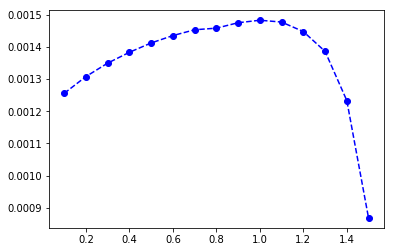

In [86]:
%run dpa_mccm.py

In [44]:
0.02468/(0.02468+0.0188)

0.5676172953081876